# Data Science Project for Bike Sharing Dataset
- Fadel Achmad Daniswara 
- Electrical Engineering Student at Universitas Indonesia
- Data Science and Machine Learning Enthusiast

## Define Question

- Bagaimana pengaruh demand rental sepeda antara registered user dan casual user terhadap user keseluruhan?✅
- Bagaimana pengaruh cuaca terhadap demand total user peminjaman sepeda dalam kurun waktu satu minggu?✅
- Bagaimana demand peminjaman sepeda dari user secara keseluruhan dari tahun ke tahun?✅

## Packages/Library
- NumPy
- Pandas
- Seabord
- Matplotlib
- Scikit-learn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

### Gathering Data
- Proses gathering data disini terdapat proses merging antara dua dataset, yaitu day.csv dan hour.csv. Hasil gabungan kedua dataset ini akan menghasilkan dataset baru, yaitu bike_sharing_df dengan kolom-kolom yang sama, namun terdapat kolom "hr" yang hanya ada di dataset hour.csv.

- Disini saya juga melakukan proses re-arrangement dataset yang berfungsi untuk mengubah urutan kolom "hr" yang tadinya berada pada posisi paling belakang menjadi di sebelah kanan kolom "dteday".

In [3]:
# Gathering two dataset
bike_per_day_df = pd.read_csv("day.csv")
bike_per_hour_df = pd.read_csv("hour.csv")\

# print(f"Dataset Bike per Day\n {bike_per_day_df.head()}\n")
# print(f"Dataset Bike per Hour\n {bike_per_hour_df.head()}")

# Merging two dataset
bike_sharing_df = pd.merge(
    left=bike_per_day_df,
    right=bike_per_hour_df[["dteday","hr"]],
    how="left",
    on="dteday"
)

# Re-arrange Dataset
columns = bike_sharing_df.columns.tolist()
columns.insert(2, columns.pop(columns.index("hr")))
bike_sharing_df = bike_sharing_df[columns]

print(f"Bike Sharing Dataset \n {bike_sharing_df.head()}")

Bike Sharing Dataset 
    instant      dteday  hr  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01   0       1   0     1        0        6           0   
1        1  2011-01-01   1       1   0     1        0        6           0   
2        1  2011-01-01   2       1   0     1        0        6           0   
3        1  2011-01-01   3       1   0     1        0        6           0   
4        1  2011-01-01   4       1   0     1        0        6           0   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.344167  0.363625  0.805833   0.160446     331         654   
2           2  0.344167  0.363625  0.805833   0.160446     331         654   
3           2  0.344167  0.363625  0.805833   0.160446     331         654   
4           2  0.344167  0.363625  0.805833   0.160446     331         654   

   cnt  
0  985  
1  985  
2  985  
3  

**Insight:**
- Dataset bike_per_day_df dan bike_per_hour_df memiliki kolom yang sama, yang membedakan hanyalah kolom hour pada bike_per_hour_df.
- Melakukan proses merging pada kedua dataset tersebut, sehingga hanya akan ada satu dataset yaitu bike_sharing_df.
- Melakukan proses re-arrange dari dataset gabungan yang baru. Hal ini dilakukan karena kolom "hr" berada di paling belakang. Kolom "hr" dipindahkan ke samping kanan "dteday"

### Assessing Data

- Mengecek dataset bike_sharing_df jika terdapat nilai yang duplikat atau nilai null.

In [4]:
# Checking Null Values
print(f"Null Values from Dataset \n{bike_sharing_df.isnull().sum()}\n")

# Checking Duplicated Values
print(f"Duplicated Values from Dataset : {bike_sharing_df.duplicated().sum()}\n")

Null Values from Dataset 
instant       0
dteday        0
hr            0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicated Values from Dataset : 0



### Cleaning Data

- Mengecek sekaligus memperbaiki jika terdapat format date and time yang salah.

In [5]:
# Fix the Date and Time Format
bike_sharing_df["dteday"] = pd.to_datetime(bike_sharing_df["dteday"], format="%Y-%m-%d")
incorrectDate = bike_sharing_df[bike_sharing_df["dteday"].isna()]
print(incorrectDate)


Empty DataFrame
Columns: [instant, dteday, hr, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


- Membuat batas atas dan bawah yang diperlukan untuk menghapus nilai outlier yang berada pada kondisi tersebut.

In [6]:
# Drop Outlier for casual columns
Q1 = bike_sharing_df["casual"].quantile(0.25)
Q3 = bike_sharing_df["casual"].quantile(0.75)

IQR = Q3 - Q1
upperBound = Q3 + 1.5 * IQR
lowerBound = Q1 - 1.5 * IQR

upperCondition = bike_sharing_df["casual"] > upperBound
lowerCondition = bike_sharing_df["casual"] < lowerBound

- Trimming dataset yang telah di cek nilai outliernya.

In [7]:
# Trimming New Dataset
new_bike_sharing_df = bike_sharing_df[bike_sharing_df["casual"] < upperBound]
new_bike_sharing_df.shape

(16323, 17)

- Melakukan proses capping pada dataset yang baru, sehingga dataset yang baru tidak memiliki outlier pada kolom "casual".

In [8]:
# Capping the Dataset
new_bike_sharing_df_cap = bike_sharing_df.copy()
new_bike_sharing_df_cap["casual"] = np.where(
    new_bike_sharing_df_cap["casual"] > upperBound,
    upperBound,
    np.where(
        new_bike_sharing_df_cap["casual"] < lowerBound,
        lowerBound,
        new_bike_sharing_df_cap["casual"]
    )
)

**Insight:**
- Tidak terdapat format date and time yang tidak sesuai.
- Terdapat outlier pada kolom "casual", sehingga outlier pada kolom tersebut perlu di hapus.

## Exploratory Data Analysis (EDA)

### Measure of Central Tendency
- Mengecek rata-rata dan median dari seluruh kolom pada dataset bike_sharing_df. Hal ini dilakukan untuk melihat seberapa jauh perbedaan antara nilai rata-rata dengan mediannya. Hal ini juga dapat menjadi acuan apakah dari setiap kolom terdapat outlier yang disebabkan jauhnya nilai rata-rata dengan mediannya.

In [9]:
# Measure of Central Tendency
print(bike_sharing_df.describe(include="all"))

            instant                         dteday            hr  \
count  17379.000000                          17379  17379.000000   
mean     367.172622  2012-01-02 04:08:34.552045568     11.546752   
min        1.000000            2011-01-01 00:00:00      0.000000   
25%      185.000000            2011-07-04 00:00:00      6.000000   
50%      367.000000            2012-01-02 00:00:00     12.000000   
75%      549.000000            2012-07-02 00:00:00     18.000000   
max      731.000000            2012-12-31 00:00:00     23.000000   
std      210.072051                            NaN      6.914405   

             season            yr          mnth       holiday       weekday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775      0.028770      3.003683   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      0.000000      1.00

**Insight:**
- Dari hasil analisis mean dan median diatas, tidak terdapat perbedaan yang signifikan antara mean dan median dari setiap kolom.
- Pada kolom casual, mean dan median terlihat cukup berbeda. Oleh karena itu, saya akan membuat box plot agar bisa melihat apakah terdapat outlier pada kolom casual.

### Measure of Dispersion
- Pada tahapan ini, histogram dari kolom yang bertipe data numerical akan dilihat. Hal ini akan memberitahu insight tentang persebaran dari kolom tersebut pada dataset. Saya juga membuat box plot dari seluruh kolom yang bertipe data numerikal. Hal ini juga dapat melihat outlier pada data.

#### Histogram for Casual User
- Membuat histogram dari kolom "casual" untuk melihat bagaimana persebaran casual user terhadap total user peminjaman sepeda.

Korelasi antara casual user dengan total user : 0.6804222590151668


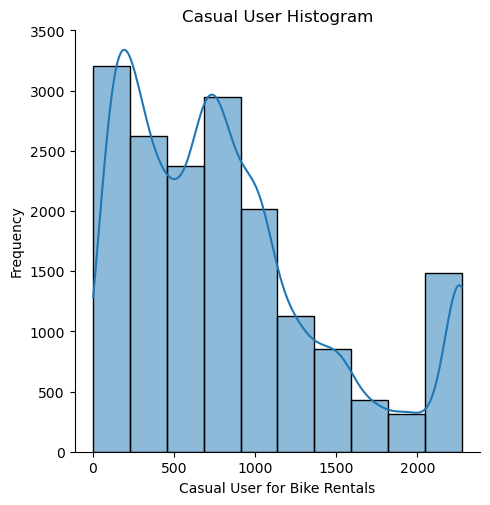

In [10]:
# Histogram Plot for Casual User
sns.displot(data=new_bike_sharing_df_cap, x="casual", bins=10, kde=True)
plt.title("Casual User Histogram")
plt.xlabel("Casual User for Bike Rentals")
plt.ylabel("Frequency")

userCorr = new_bike_sharing_df_cap["casual"].corr(new_bike_sharing_df_cap["cnt"])
print(f"Korelasi antara casual user dengan total user : {userCorr}")

#### Box Plot for Casual User
- Membuat box plot dari kolom "casual" untuk melihat bagaimana sensitivitas data tersebut terhadap outlier.

Text(0, 0.5, 'Frequency')

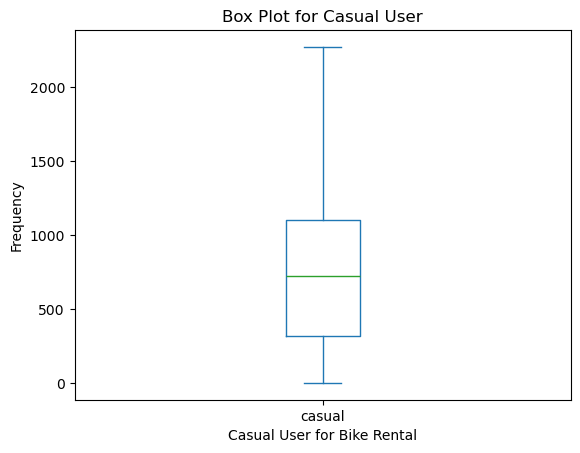

In [11]:
# Box Plot for Casual User
ax = (new_bike_sharing_df_cap["casual"]).plot.box()
ax.set_title("Box Plot for Casual User")
ax.set_xlabel("Casual User for Bike Rental")
ax.set_ylabel("Frequency")

**Insight**
- Persebaran data dari casual user menunjukkan bentuk distribusi yang skewed ke kanan. Hal ini dapat disimpulkan bahwa mayoritas user casual menggunakan rental sepeda dalam jumlah yang relatif kecil.
- Dari box plot tersebut, sudah tidak ada lagi outlier yang berada pada kolom casual.

#### Histogram for Registered User
- Membuat histogram dari kolom "registered" untuk melihat bagaimana persebaran data dari registered user terhadap total user peminjaman sepeda.

Korelasi antara register dan total user : 0.9440516178159458


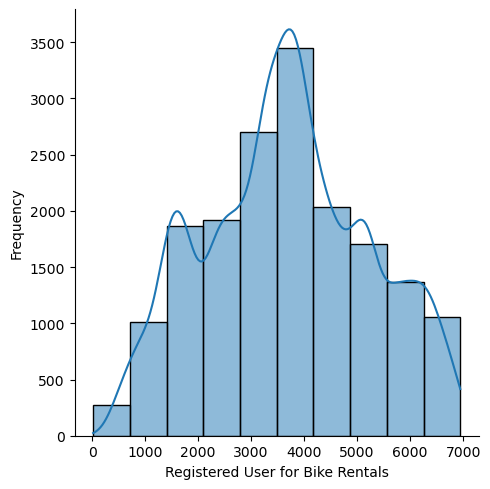

In [12]:
# Histogram Plot for Registered User
ax = sns.displot(x="registered", data=new_bike_sharing_df_cap, bins=10, kde=True)
ax.set_xlabels("Registered User for Bike Rentals")
ax.set_ylabels("Frequency")

registerCor = new_bike_sharing_df_cap["registered"].corr(new_bike_sharing_df_cap["cnt"])
print(f"Korelasi antara register dan total user : {registerCor}")

#### Box Plot for Registered User
- Membuat box plot dari registered user agar dapat melihat outlier dari kolom "registered".

Text(0, 0.5, 'Registered User for Bike Rental')

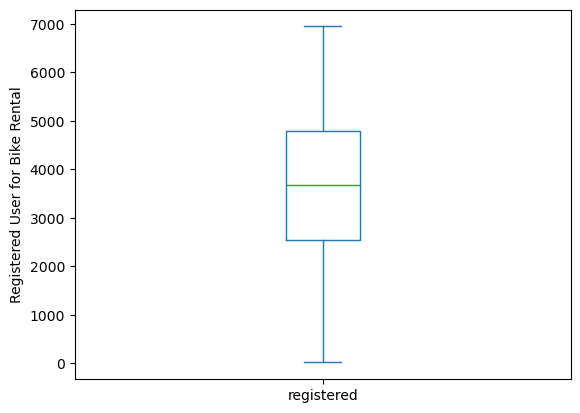

In [13]:
# Box Plot for Registered User
ax = (new_bike_sharing_df_cap["registered"]).plot.box()
ax.set_ylabel("Registered User for Bike Rental")

**Insight**
- Histogram dari registered user memiliki pola persebaran yang normal dan cenderung lebih konsisten. Hal ini dapat disimpulkan bahwa registered user merupakan loyal customer dari peminjaman sepeda ini.
- Box plot dari registered user tidak memiliki outlier sama sekali. Hal ini dapat disimpulkan bahwa customer behaviour dari registered user cenderung lebih konsisten menggunakan rental sepeda.

#### Histogram for Total User
- Membuat histogram dari total user untuk melihat pola persebaran data dari total user.

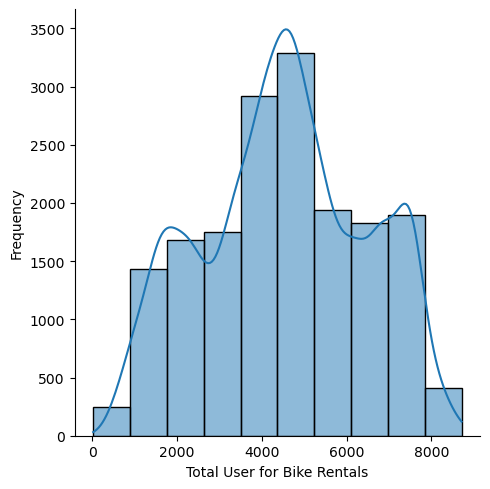

In [14]:
# Histogram Plot for Total User
ax = sns.displot(x="cnt", data=new_bike_sharing_df_cap, bins=10, kde=True)
ax.set_xlabels("Total User for Bike Rentals")
ax.set_ylabels("Frequency")

#### Box Plot for Total User
- Membuat box plot dari total user untuk melihat outlier pada data.

Text(0, 0.5, 'Total User for Bike Rental')

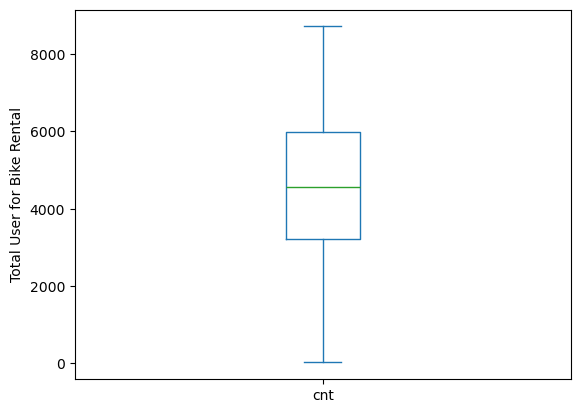

In [15]:
# Box Plot for Total User
ax = (new_bike_sharing_df_cap["cnt"]).plot.box()
ax.set_ylabel("Total User for Bike Rental")

**Insight**
- Histogram dari total user menunjukkan distribusi yang cenderung normal. Hal ini dapat disimpulkan bahwa mayoritas dari total user berasal dari registered user.
- Box plot dari total user tidak menunjukkan adanya outlier. Hal ini menunjukkan bahwa total user cukup konsisten menggunakan rental sepeda.

## Data Visualization and Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap demand total user peminjaman sepeda dalam kurun waktu  satu minggu?

Text(0, 0.5, 'Total User of Bike Rental')

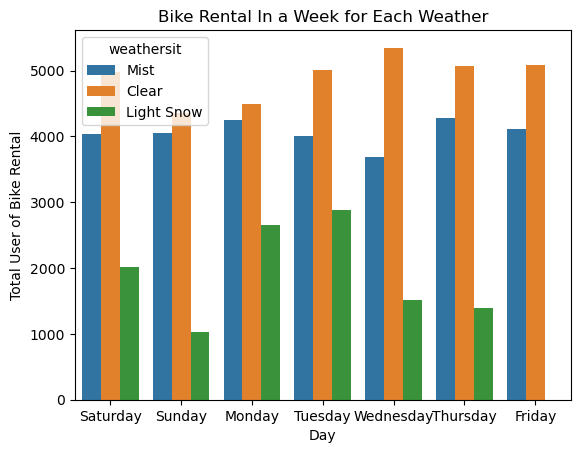

In [16]:
# Bar Plot for weathersit
weatherMap = {
    1: "Clear",
    2: "Mist",
    3: "Light Snow",
    4: "Heavy Rain"
}

weekdayMap = {
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
}

new_bike_sharing_df_cap["weekday"] = new_bike_sharing_df_cap["weekday"].map(weekdayMap)
new_bike_sharing_df_cap["weathersit"] = new_bike_sharing_df_cap["weathersit"].map(weatherMap)

sns.barplot(x="weekday", y="cnt", data=new_bike_sharing_df_cap, hue="weathersit", errorbar=None)
plt.title("Bike Rental In a Week for Each Weather")
plt.xlabel("Day")
plt.ylabel("Total User of Bike Rental")

**Insight**
- Dalam kurun waktu satu minggu, total peminjaman sepeda terbanyak ada pada cuaca yang cerah pada hari rabu.
- Total peminjaman sepeda terendah ada hari minggu dengan cuaca yang cerah. Hal ini dapat diakibatkan hari minggu merupakan hari libur.
- Total peminjaman sepeda terendah juga terdapat pada cuaca yang "Light Snow". Hal ini dapat diakibatkan jalanan yang penuh salju sehingga membuat sepeda tidak feasible untuk digunakan.

### Pertanyaan 2: Bagaimana pengaruh hari libur pada demand peminjaman sepeda di setiap musim?

Text(0, 0.5, 'Total User of Bike Rental')

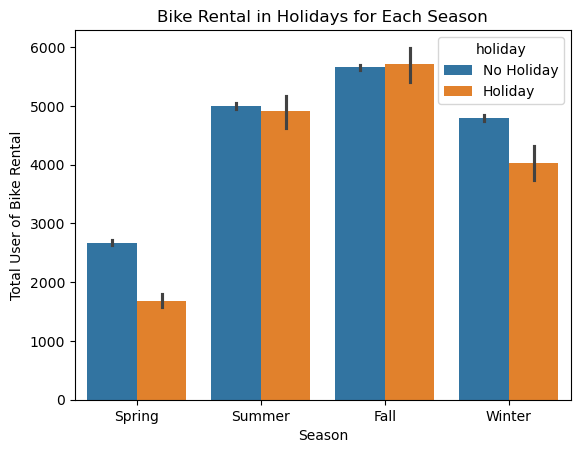

In [17]:
# Bar Plot Holiday
holidayMap = {
    0: "No Holiday",
    1: "Holiday"
}

seasonMap = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

new_bike_sharing_df_cap["holiday"] = new_bike_sharing_df_cap["holiday"].map(holidayMap)
new_bike_sharing_df_cap["season"] = new_bike_sharing_df_cap["season"].map(seasonMap)

sns.barplot(x="season", y="cnt", hue="holiday", data=new_bike_sharing_df_cap)
plt.title("Bike Rental in Holidays for Each Season")
plt.xlabel("Season")
plt.ylabel("Total User of Bike Rental")

**Insight**
- Musim gugur menjadi musim dengan demand peminjaman sepeda terbanyak baik di hari libur dan hari biasa.
- Musim semi menjadi musim dengan demand peminjaman sepeda yang paling sedikit diantara ketiga musim baik di hari libur maupun hari biasa. 
- Dari keempat musim, peminjaman sepeda terbanyak terdapat pada hari biasa. Hal ini dapat disebabkan oleh hari-hari tertentu seperti hari kerja.

### Pertanyaan 3: Bagaimana demand peminjaman sepeda dari user secara keseluruhan dari tahun ke tahun?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([14975., 15065., 15156., 15248., 15340., 15431., 15522., 15614.,
        15706.]),
 [Text(14975.0, 0, '2011-01'),
  Text(15065.0, 0, '2011-04'),
  Text(15156.0, 0, '2011-07'),
  Text(15248.0, 0, '2011-10'),
  Text(15340.0, 0, '2012-01'),
  Text(15431.0, 0, '2012-04'),
  Text(15522.0, 0, '2012-07'),
  Text(15614.0, 0, '2012-10'),
  Text(15706.0, 0, '2013-01')])

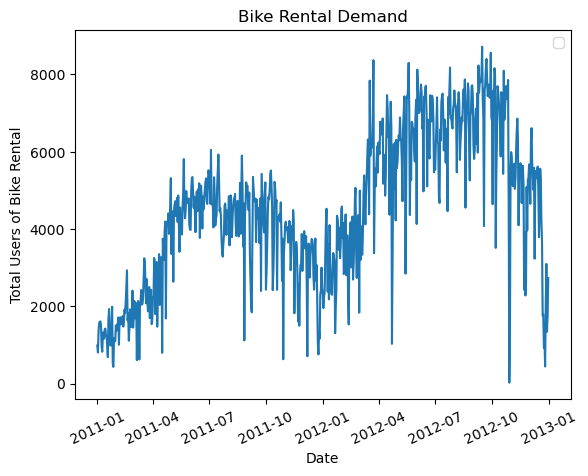

In [18]:
# Time Series Plot
sns.lineplot(x="dteday", y="cnt", data=new_bike_sharing_df_cap)
plt.title("Bike Rental Demand")
plt.ylabel("Total Users of Bike Rental")
plt.legend()
plt.xlabel("Date")
plt.xticks(rotation=25)

## Conclusion

- Demand penggunaan rental sepeda sangat dipengaruhi oleh cuaca. Dapat dilihat dari bar chart bahwa cuaca yang cerah lebih cocok digunakan untuk bersepeda dibandingkan dengan cuaca yang bersalju atau berkabut.
- Dari setiap musim, dapat dilihat bahwa demand rental sepeda lebih banyak digunakan pada hari biasa pada setiap musim. Hal tersebut disebabkan oleh hari kerja yang dimana orang-orang akan membutuhkan layanan rental sepeda.
- Demand rental sepeda memiliki kenaikan demand sepanjang tahun 2012.